# Mathematics of Poker 

**Part II Chapter 4: Expoitive Play**<br>
Pot Odds and Implied Odds


----------------

### Example 4.1: A Toy Game
Two players plan heads up limit poker on the river. <br>

Facts: 
The pot is 4 BB. <br>
Player A has either the nuts (20% of the time) or valueless hand (80% of the time). <br>
Player B always has a middle strength hand -- enough to beat the valueless hands, but of course not enough to beat the nuts. <br>
Both Players know the each others' ranges. 
Player A plays first. <br>



Now suppose that A checks. Now if B bets, A knows whether his hand is a winning hand. This means that he can play perfectly against B by raising all of his nutted hands and fold at least most of his valueless hands. So B cannot gain an edge by betting. 

So A will bet all of his nut hands first to act and some of his bluffs. <br>

We can let his bluff frequency be equal to $x \in [0,1]$ 

A selection of $x$ defines his strategy. 

Continue to consider B's strategy. We know that B _loses_ 1 BB by calling when he is beat and wins 5 BB when calling when he is winning. 
<br>5BB = 4BB Pot + 1BB bet. 


What is expectation of B calling 100% of the time for a given $x$? 



In [2]:
# this is equal to the sum of 
# the probability that A is betting with the nuts * -1BB
# plus the probability that A is bluffing * 5BB


def B_STRAT_EXP(x):
    # val1 = p_nuts * -1
    # val2 = p_bluff * 5
    
    return(.2 * -1) + 5*x
    
    

Now we can make a table to view consider some of the scenarios across A's bluffing frequencies. 

In [7]:
import pandas as pd 

COLUMNS = ['x', 'B_CALL100_EV']

# 0 to .8 is 100% of the range since 20% of the time, A has the nuts
X_FREQUENCY_LIST = [0, 0.01, 0.02, 0.04, .1, .3, .5, .7, .8] 

def generate_data(frequency_list):
    results = []
    for x in frequency_list:
        data = x, B_STRAT_EXP(x)
        results.append(data)
        
    return results


def make_chart(COLUMNS, data, frequency_list):
    df = pd.DataFrame(data=data, columns=COLUMNS)
    df.index = ["A blufsf %:  " + str(x) + "  " for x in frequency_list]
    return df
    

In [8]:
df = make_chart(COLUMNS, data = generate_data(X_FREQUENCY_LIST), frequency_list=X_FREQUENCY_LIST)
df

,x,B_CALL100_EV
A blufsf %: 0,0.00,-0.20
A blufsf %: 0.01,0.01,-0.15
A blufsf %: 0.02,0.02,-0.10
A blufsf %: 0.04,0.04,0.00
A blufsf %: 0.1,0.10,0.30
A blufsf %: 0.3,0.30,1.30
A blufsf %: 0.5,0.50,2.30
A blufsf %: 0.7,0.70,3.30
A blufsf %: 0.8,0.80,3.80


Let's visualize how B's EV of calling 100% changes as A's bluff frequency varies for some more values. 

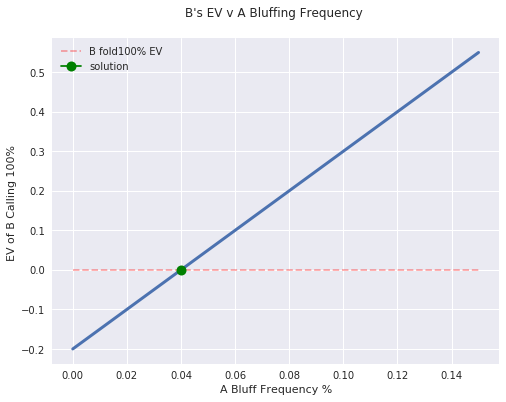

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df = make_chart(COLUMNS, data = generate_data([0, 0.01, 0.02, 0.04, .1, .15]), frequency_list=[0, 0.01, 0.02, 0.04, .1, .15])

fig = plt.figure(figsize=(8,6))
plt.plot(df.x, df.B_CALL100_EV, linewidth=3)
plt.plot(df.x, [0 for i in df.x], 'r--', alpha=.35, label = 'B fold100% EV')
plt.plot([0.04], [0], marker='o', markersize=10, color="green", label='solution') # the intersection
plt.legend(loc='upper left')

plt.title("B's EV v A Bluffing Frequency \n")
plt.xlabel("A Bluff Frequency %")
plt.ylabel("EV of B Calling 100% ")


plt.savefig('Example-4.1-BluffFrequencyVEV.png')
plt.show()

### Pot Odds
